 In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

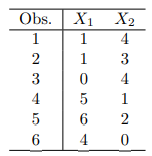

(a) Plot the observations.

In [51]:
print('''The observations：
Obs1: (1,4)
Obs2: (2,3)
Obs3: (0,4)
Obs4: (5,1)
Obs5: (6,2)
Obs6: (4,0)''')

The observations：
Obs1: (1,4)
Obs2: (2,3)
Obs3: (0,4)
Obs4: (5,1)
Obs5: (6,2)
Obs6: (4,0)


(b) Randomly assign a cluster label to each observation. You can use
the np.random.choice() function to do this. Report the cluster
labels for each observation.

In [52]:
import numpy as np

n = 6  # There are 6 observations in total
K = 2  # 2 group

# Random assignment cluster label (1 或 2)
labels = np.random.choice([1, 2], size=n)
print(labels)


[1 1 2 2 2 2]


* Obs1: (1,4) [1]
* Obs2: (2,3) [1]
* Obs3: (0,4) [2]
* Obs4: (5,1) [2]
* Obs5: (6,2) [2]
* Obs6: (4,0) [2]

(c) Compute the centroid for each cluster.


In [53]:
import numpy as np

# Original data (X1, X2)
X = np.array([
    [1, 4],  # Obs1
    [2, 3],  # Obs2
    [0, 4],  # Obs3
    [5, 1],  # Obs4
    [6, 2],  # Obs5
    [4, 0]   # Obs6
])

# (b) Random clustering results
labels = np.array([1, 1, 2, 2, 2, 2])

# (c) Calculate the centroid of each group
centroids = []
for k in [1, 2]:
    cluster_points = X[labels == k]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)
print("Centroids:\n", centroids)


Centroids:
 [[1.5  3.5 ]
 [3.75 1.75]]


(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.


In [54]:

# (d) Redistribution: Calculate the distance between each point and the two centroids
new_labels = []
for point in X:
    distances = np.linalg.norm(point - centroids, axis=1)  # Distance to centroid1, centroid2
    new_labels.append(np.argmin(distances) + 1)  # +1 Because we mark the group as 1,2
new_labels = np.array(new_labels)

print("Reassigned labels:", new_labels)


Reassigned labels: [1 1 1 2 2 2]


* Obs1: (1,4) [1]
* Obs2: (2,3) [1]
* Obs3: (0,4) [1]
* Obs4: (5,1) [2]
* Obs5: (6,2) [2]
* Obs6: (4,0) [2]

(e) Repeat (c) and (d) until the answers obtained stop changing.


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Original data (X1, X2)
X = np.array([
    [1, 4],  # Obs1
    [2, 3],  # Obs2
    [0, 4],  # Obs3
    [5, 1],  # Obs4
    [6, 2],  # Obs5
    [4, 0]   # Obs6
])

n, p = X.shape
K = 2

# (b) Initial random clustering
labels = np.random.choice([1, 2], size=n)
print("Initial labels:", labels)

# K-means iteration
while True:
    # (c) Calculate centroid
    centroids = []
    for k in [1, 2]:
        cluster_points = X[labels == k]
        centroid = cluster_points.mean(axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    # (d) Redistribution
    new_labels = []
    for point in X:
        distances = np.linalg.norm(point - centroids, axis=1)
        new_labels.append(np.argmin(distances) + 1)  # +1 Because we mark the group as 1,2
    new_labels = np.array(new_labels)

    # Check convergence (labels unchanged)
    if np.array_equal(labels, new_labels):
        break
    labels = new_labels

print("Final labels:", labels)
print("Final centroids:\n", centroids)


Initial labels: [2 2 1 2 2 1]
Final labels: [1 1 1 2 2 2]
Final centroids:
 [[1.         3.66666667]
 [5.         1.        ]]


(f) In your plot from (a), color the observations according to the
cluster labels obtained.

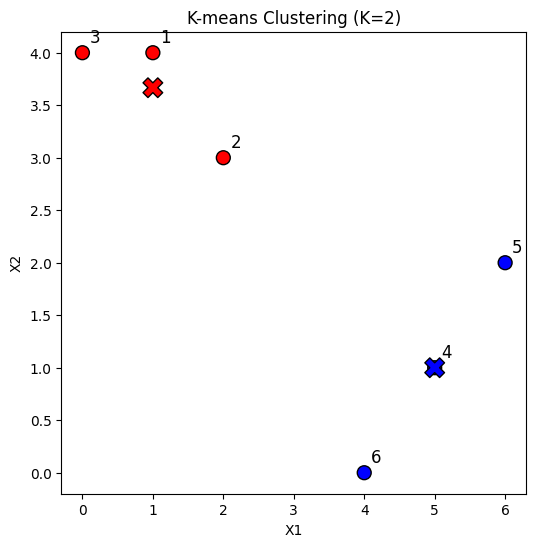

In [56]:
# Draw observation points
plt.figure(figsize=(6, 6))
colors = ['red' if l == 1 else 'blue' for l in labels]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='k')

# Draw centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red', 'blue'],
            marker='X', s=200, edgecolors='k')

# Add the dot number
for i, (x1, x2) in enumerate(X, start=1):
    plt.text(x1 + 0.1, x2 + 0.1, str(i), fontsize=12)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("K-means Clustering (K=2)")
plt.show()
